In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine learning algorithms
# Scaler
from sklearn.preprocessing import  StandardScaler
# Linera regression
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
# Polynomial regression
from sklearn.preprocessing import  PolynomialFeatures
# Decisin tree
from sklearn.tree import DecisionTreeRegressor
# Neural network
from sklearn.neural_network import  MLPClassifier
# data split
from sklearn.model_selection import train_test_split
# scores
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
# Models
plt.style.use('seaborn-v0_8-darkgrid')
lr=LinearRegression()
logr=LogisticRegression()
ridge=Ridge(alpha=0.01)
dt=DecisionTreeRegressor(max_depth=20, min_samples_split=10, random_state=5)

In [3]:
# Import dataframes
wt=pd.read_excel('Research dataset.xlsx', sheet_name='wt')
rf=pd.read_excel('Research dataset.xlsx', sheet_name='rf')
tmp=pd.read_excel('Research dataset.xlsx', sheet_name='tmp')

In [4]:
# Data Seperate by upazilla
# Water table dataset for each upazilla/station
abhaynagar_wt   = wt[wt.wid=='JES14']
abhaynagar_2_wt = wt[wt.wid=='JES12']
bagherpara_wt   = wt[wt.wid=='JE014']
chaugachha_wt   = wt[wt.wid=='JE009']
jessore_1_wt    = wt[wt.wid=='JE026']
jessore_2_wt    = wt[wt.wid=='JE018']
keshabpur_1_wt  = wt[wt.wid=='JE038']
keshabpur_2_wt  = wt[wt.wid=='JE057']
manirampur_wt   = wt[wt.wid=='JE010']
sharsha_1_wt    = wt[wt.wid=='JE055']
sharsha_2_wt    = wt[wt.wid=='JE013']

# Rainfall dataset for each upazilla
abhaynagar_rf = rf[rf.upazila=='Abhaynagar'].drop(columns=['upazila','rid'], axis=1)
sharsha_rf = rf[rf.upazila=='Sharsha'].drop(columns=['upazila','rid'], axis=1)
chaugachha_rf = rf[rf.upazila=='Chaugachha'].drop(columns=['upazila','rid'], axis=1)
jessore_rf = rf[rf.upazila=='Jessore Sadar'].drop(columns=['upazila','rid'], axis=1)
keshabpur_rf = rf[rf.upazila=='Keshabpur'].drop(columns=['upazila','rid'], axis=1)

In [5]:
# Trend plot
def plotit(n,y=(1998,2020),m=(5,10)):
    instr = ''' Invalid input.
Valids:
1 = Abhaynagar
2 = Chaugachha
3 = Jessore
4 = Keshabpur
5 = Sharsha
'''
    if n==1:
        data = abhaynagar_2_wt.merge(abhaynagar_rf, on='date', how='left').drop(columns=['upazila','wid'], axis=1).dropna().merge(tmp, on='date', how='left')
        title = 'Abhaynagar'
    elif n==2:
        data = chaugachha_wt.merge(chaugachha_rf, on='date', how='left').drop(columns=['upazila','wid'], axis=1).dropna().merge(tmp, on='date', how='left')
        title = 'Chaugachha'
    elif n==3:
        data = jessore_1_wt.merge(jessore_rf, on='date', how='left').drop(columns=['upazila','wid'], axis=1).dropna().merge(tmp, on='date', how='left')
        title = 'Jashore'
    elif n==4:
        data = keshabpur_2_wt.merge(keshabpur_rf, on='date', how='left').drop(columns=['upazila','wid'], axis=1).dropna().merge(tmp, on='date', how='left')
        title = 'Keshabpur'
    elif n==5:
        data = sharsha_1_wt.merge(sharsha_rf, on='date', how='left').drop(columns=['upazila','wid'], axis=1).dropna().merge(tmp, on='date', how='left')
        title = "Sharsha"
    else:
        print(instr)

    data=data.iloc[:,[0,3,2,1]]
    # data['target']=data.shift(-1)['wtable']
    data.dropna(inplace=True)


    data['year'] = data['date'].dt.year

    # 2. Extract Month and Encode Cyclically
    data['month'] = data['date'].dt.month
    data['sin_month'] = np.sin(2 * np.pi * data['month'] / 12)
    data['cos_month'] = np.cos(2 * np.pi * data['month'] / 12)

    # 3. Extract Day of Month and Encode Cyclically
    data['day'] = data['date'].dt.day  # Extract day of the month (1-31)
    data['sin_day'] = np.sin(2 * np.pi * data['day'] / 31)  # Important: Divide by 31 (max days in a month)
    data['cos_day'] = np.cos(2 * np.pi * data['day'] / 31)

    # Drop the original 'month' and 'day' columns if you don't need them
    data = data.drop(columns=['month', 'day'])  # Optional

    month_filter = (data.date.dt.month>=m[0])&(data.date.dt.month<=m[1])
    up= y[1]
    train_filter = (data.date.dt.year<up)&(data.date.dt.year>y[0])&month_filter


    x_train= data[train_filter].drop(columns=['wtable'], axis=1).set_index('date')
    y_train= data[train_filter].wtable

    machine=dt.fit(x_train, y_train)

    R=pd.DataFrame(machine.predict(x_train))
    R.rename(columns={0:'y'}, inplace=True)
    R['x']=R.index
    R=R[['x','y']]
    R['D']=data[train_filter].date.values

    x=R['D']
    y=R['y']

    pf= PolynomialFeatures(degree=1)
    x_poly = pf.fit_transform(x.values.reshape(-1,1))
    lr.fit(x_poly, y)

    plt.scatter(x,y, c='b', s=10)
    plt.plot(x,lr.predict(x_poly), c='r')
    plt.ylabel('Water table depth (m)')
    plt.xlabel('Date')
    plt.title(title)
    plt.ylim(0,9)
    plt.gca().invert_yaxis()
    plt.show()
    return data.head(50)
    

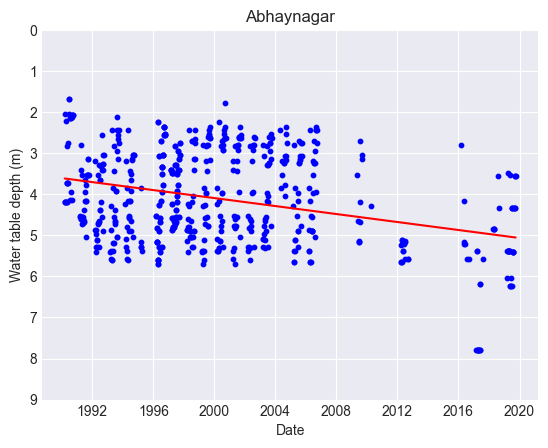

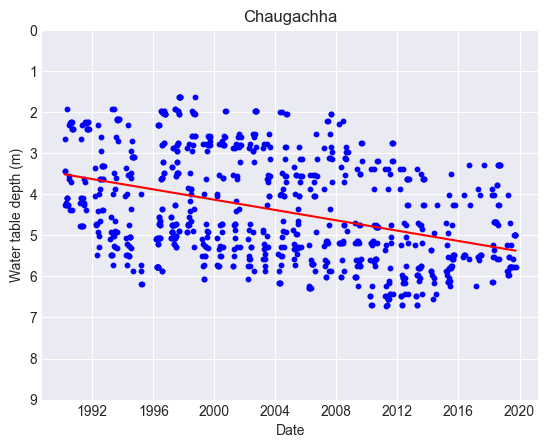

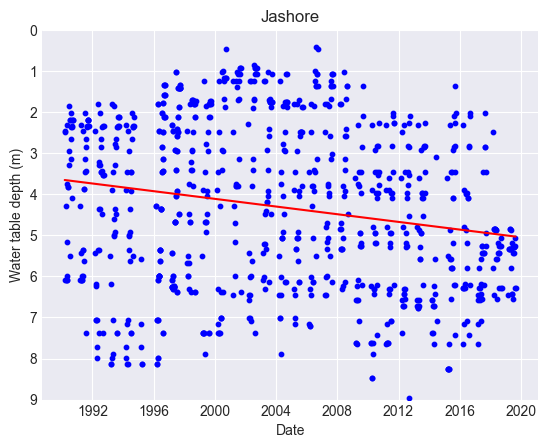

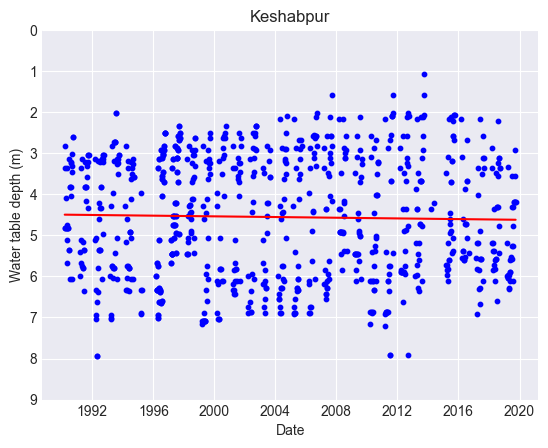

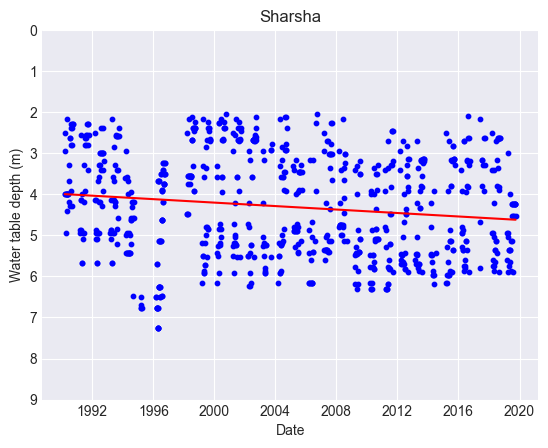

,date,temp,rfall,wtable,year,sin_month,cos_month,sin_day,cos_day
0,1990-01-01,15.1,0.0,3.56,1990,5.000000e-01,8.660254e-01,0.201299,0.979530
1,1990-01-10,15.0,0.0,2.40,1990,5.000000e-01,8.660254e-01,0.897805,-0.440394
2,1990-01-15,18.0,0.0,3.75,1990,5.000000e-01,8.660254e-01,0.101168,-0.994869
3,1990-01-22,20.5,0.0,3.80,1990,5.000000e-01,8.660254e-01,-0.968077,-0.250653
4,1990-01-29,23.4,0.0,3.85,1990,5.000000e-01,8.660254e-01,-0.394356,0.918958
5,1990-02-04,20.1,0.0,3.80,1990,8.660254e-01,5.000000e-01,0.724793,0.688967
6,1990-02-07,21.8,0.0,3.40,1990,8.660254e-01,5.000000e-01,0.988468,0.151428
7,1990-02-19,22.1,75.2,4.20,1990,8.660254e-01,5.000000e-01,-0.651372,-0.758758
8,1990-02-26,20.9,48.3,4.00,1990,8.660254e-01,5.000000e-01,-0.848644,0.528964
9,1990-03-09,23.7,0.0,2.15,1990,1.000000e+00,6.123234e-17,0.968077,-0.250653


In [9]:
plotit(1,(1989,2020),(6,9))
plotit(2,(1989,2020),(6,9))
plotit(3,(1989,2020),(6,9))
plotit(4,(1989,2020),(6,9))
plotit(5,(1989,2020),(6,9))